<center> # Naive Bayesian classifier</center>

The purpose of the exercise is to learn the techniques for constructing a naive Bayesian classifier.



In [139]:
import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



In [140]:

df = pd.read_csv('data.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Next, check which columns contain text or numeric data. To do this, check the value of the *dtype* argument with the appropriate condition:

In [141]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Dane tesktowe zawierają kolumny :\n\n', categorical)


Dane tesktowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Check the data in the columns for gaps and if so, complete them according to methods you are familiar with:

In [142]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

On the prepared data, carry out the process of creating learning and test sets so that the classifier recognizes to which of the groups in the 'income' column the described person belongs

In [143]:
X = df.drop(['income'], axis = 1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Using the category_encoders library, carry out the process of encoding tect variables from other categories into numeric values:

In [144]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Using GaussianNB, perform daych classification from test and training sets. Give the accuracy of the model and the error matrix with its graph and interpretation.

In [145]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Conduct classifier learning for *race* and *native_country* columns. Give the accuracy of the models and the error matrix with their graphs and interpretation. Present conclusions on what the obtained results depend

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

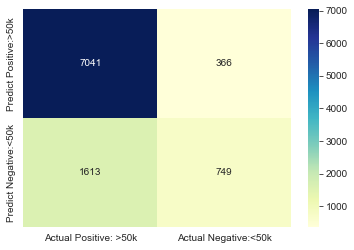

In [147]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: >50k', 'Actual Negative:<50k'], index=['Predict Positive:>50k', 'Predict Negative:<50k'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [148]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7974


# Teaching the classifier for the column "race" and "native_country"

In [149]:
X = df[['race', 'native_country']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [150]:
encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [151]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [152]:
y_pred = gnb.predict(X_test)
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

<AxesSubplot:>

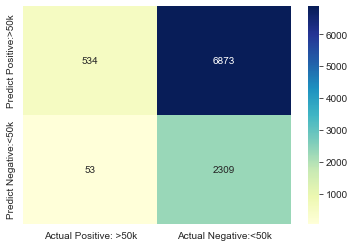

In [153]:
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: >50k', 'Actual Negative:<50k'], index=['Predict Positive:>50k', 'Predict Negative:<50k'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [154]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.2910


# Conclusions:
While the first model came out neutral for us, the second model predicts the results very inaccurately. In my opinion, this is due to the low correlation between the "race" and "native_country" columns and the "income" column. To improve the model, we could use scaling, as is done in the article